In [ ]:
!pip install datasets
!pip install transformers
!pip install sacrebleu
!pip install sentencepiece
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.3 MB/s eta 0:00

In [ ]:
import collections
from collections import Counter

import numpy as np
import pandas as pd

%matplotlib inline
!pip install python-bidi
!pip install arabic_reshaper


from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from PIL import Image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('tunsi_english_data.csv', error_bad_lines=False, sep=',', encoding='utf-8')
data.head(5)

<ipython-input-3-6d715a9a5f21>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('tunsi_english_data.csv', error_bad_lines=False, sep=',', encoding='utf-8')


,Unnamed: 0,en,tn
0,0,Take the kid by the hand and cross the street ...,شد إطفل من يدو وشق بيه إلكياس
1,1,He took the chair with his leg and threw it.,شد إلكرسي من ساقو ورماه
2,2,Grab the rope well and don't let go.,شد الحبل بالقوي وماتسيبوش
3,3,Messi got into a pattern of scoring every match.,ميسي شد الريتم متاع التسجيل في كل ماتش
4,4,He held to his opinion and didn't want to chan...,شد في رايو وما حبش يبدل فكرتو


In [ ]:
def word_count(txt):
    if isinstance(txt, float):  # Check if the input is a float
        return 0  # Return 0 for float values
    return len(txt.split())

# Applying the Word Count Function to 'en' and 'tn' Columns
data['En_Count'] = data['en'].apply(lambda x: word_count(x))
data['Tn_Count'] = data['tn'].apply(lambda x: word_count(x))

print('{} English Words'.format(data['En_Count'].sum()))
print('{} Tunisian Words'.format(data['Tn_Count'].sum()) )


#thzt is how we learnt thzt our dataset wasn't explioct!!!!!

47340 English Words
19970 Tunisian Words


In [ ]:


fig = make_subplots(rows=1, cols=2, subplot_titles=("English","Tunsi"))

fig.add_trace(
    go.Histogram(x=data['En_Count'],histfunc='sum',opacity =0.8,showlegend=False,text='En'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=data['Tn_Count'],histfunc='sum', opacity =0.8,showlegend=False,text='Tn'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()






In [ ]:

#Checking for Null/Missing Values
data.isna().sum()


Unnamed: 0    0
en            0
tn            0
En_Count      0
Tn_Count      0
dtype: int64

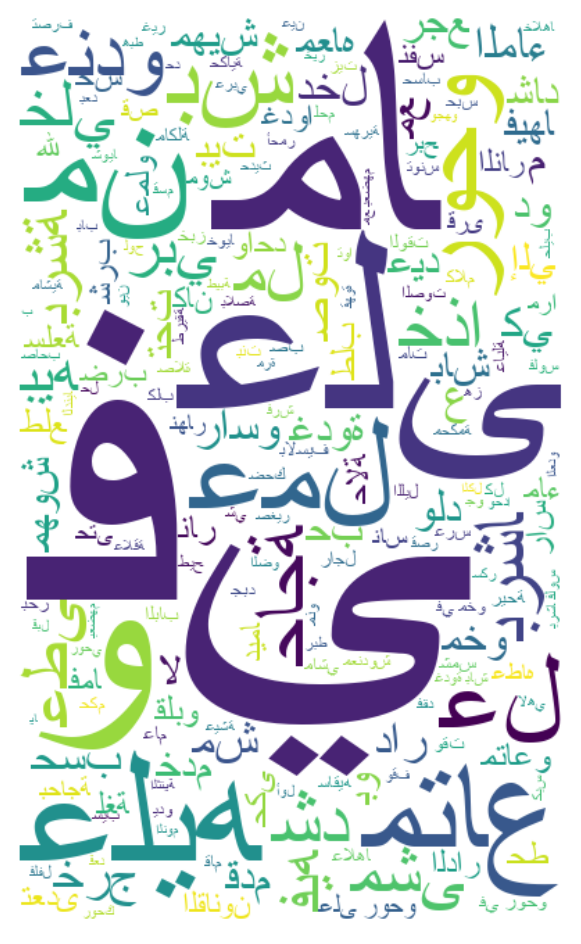

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tun_mask = np.array(Image.open("black_tunis.png"))
stpword = set(STOPWORDS)
sample_corpus=' '.join(data['tn'])
data_sample = arabic_reshaper.reshape(sample_corpus)
data_sample = get_display(data_sample) # add this
WordCloud = WordCloud(font_path='arial.ttf',
                      background_color='white', mode='RGB', width=800, mask=tun_mask,
                      height=800,stopwords=stpword).generate(data_sample)
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()


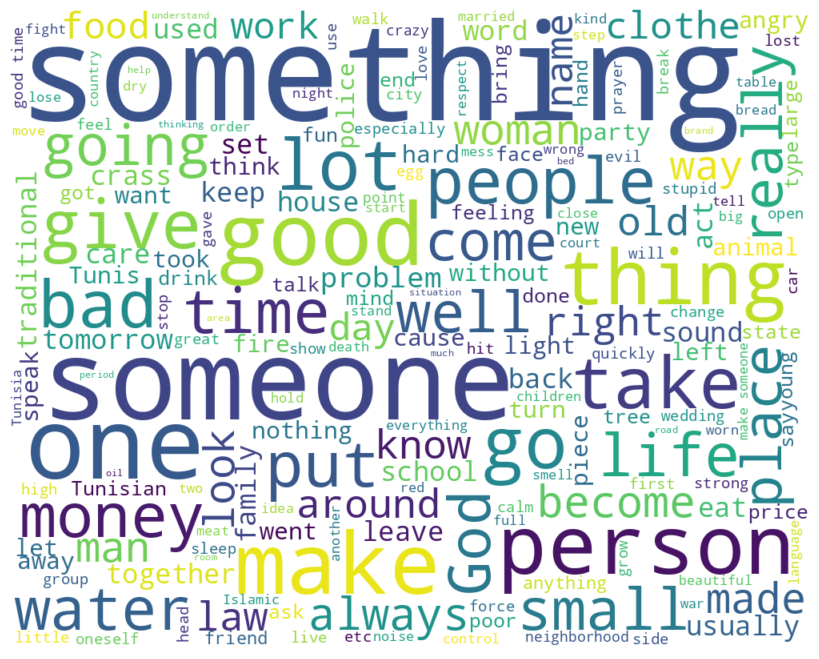

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

sample_corpus=' '.join(data['en'])
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='white',
                stopwords = stopwords, mode='RGB').generate(sample_corpus)

# plot the WordCloud image
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [ ]:
df1 = data



train_data, valid_data = train_test_split(df1, test_size=0.2, random_state = 42)
train_data.to_csv('train_data.csv')
valid_data.to_csv('valid_data.csv')

train = pd.read_csv('train_data.csv')
valid = pd.read_csv('valid_data.csv')



In [ ]:
import pandas as pd

# Read the text file
with open('ara_eng.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Split English and Arabic sentences and create a dictionary
data = {
    'English': [line.split('\t')[0].strip() for line in lines],
    'Arabic': [line.split('\t')[1].strip() for line in lines]
}

# Create the dataframe
df = pd.DataFrame(data)

# Display the dataframe
print(df)

                                                 English  \
0                                                    Hi.   
1                                                   Run!   
2                                                  Help!   
3                                                  Jump!   
4                                                  Stop!   
...                                                  ...   
24633  rising voices promoting a more linguistically ...   
24634  following last year s successful campaign we i...   
24635  during last year s challenge we also met langu...   
24636  to take part just follow the simple steps outl...   
24637  you will also find links to some free web base...   

                                                  Arabic  
0                                                مرحبًا.  
1                                                  اركض!  
2                                                النجدة!  
3                                          

In [ ]:
df.head(-10)

,English,Arabic
0,Hi.,مرحبًا.
1,Run!,اركض!
2,Help!,النجدة!
3,Jump!,اقفز!
4,Stop!,قف!
...,...,...
24623,secrets to enjoy your traffic jam global voices.,كيفية الاستمتاع بالازدحام المروري الاصوات العا...
24624,traffic jam at the overcrowded mega city dhaka...,يعتبر الازدحام المروري في مدينة دكا المتاخمة ب...
24625,hong kong people living in cages global voices.,هونج كونج البعض يعيشون في اقفاص الاصوات العالمية
24626,hong kong artist kwong chi kit worked in conju...,يعمل الفنان كونج تشي من هونج كونج بالتعاون مع ...


In [ ]:
df1.head(5)

,Unnamed: 0,en,tn,En_Count,Tn_Count
0,0,Take the kid by the hand and cross the street ...,شد إطفل من يدو وشق بيه إلكياس,12,7
1,1,He took the chair with his leg and threw it.,شد إلكرسي من ساقو ورماه,10,5
2,2,Grab the rope well and don't let go.,شد الحبل بالقوي وماتسيبوش,8,4
3,3,Messi got into a pattern of scoring every match.,ميسي شد الريتم متاع التسجيل في كل ماتش,9,8
4,4,He held to his opinion and didn't want to chan...,شد في رايو وما حبش يبدل فكرتو,12,7


In [ ]:
concatenated_df = pd.concat([df1['en'], df['English']], ignore_index=True).to_frame(name='en')
concatenated_df['tn'] = pd.concat([df1['tn'], df['Arabic']], ignore_index=True)

In [ ]:
concatenated_df.head(-10)

,en,tn
0,Take the kid by the hand and cross the street ...,شد إطفل من يدو وشق بيه إلكياس
1,He took the chair with his leg and threw it.,شد إلكرسي من ساقو ورماه
2,Grab the rope well and don't let go.,شد الحبل بالقوي وماتسيبوش
3,Messi got into a pattern of scoring every match.,ميسي شد الريتم متاع التسجيل في كل ماتش
4,He held to his opinion and didn't want to chan...,شد في رايو وما حبش يبدل فكرتو
...,...,...
37660,secrets to enjoy your traffic jam global voices.,كيفية الاستمتاع بالازدحام المروري الاصوات العا...
37661,traffic jam at the overcrowded mega city dhaka...,يعتبر الازدحام المروري في مدينة دكا المتاخمة ب...
37662,hong kong people living in cages global voices.,هونج كونج البعض يعيشون في اقفاص الاصوات العالمية
37663,hong kong artist kwong chi kit worked in conju...,يعمل الفنان كونج تشي من هونج كونج بالتعاون مع ...


In [ ]:
train_data, valid_data = train_test_split(concatenated_df, test_size=0.2, random_state = 42)
train_data.to_csv('train_data_tn.csv')
valid_data.to_csv('valid_data_tn.csv')

train = pd.read_csv('train_data_tn.csv')
valid = pd.read_csv('valid_data_tn.csv')

In [ ]:
import os
from datasets import load_metric
os.environ["WANDB_DISABLED"]="true"
import transformers
print(transformers.__version__)
model_checkpoint = "Helsinki-NLP/opus-mt-ar-en"
import os
os.environ["WANDB_DISABLED"]="true"
model_checkpoint = "Helsinki-NLP/opus-mt-ar-en"

import json

import pandas as pd
from datasets import DatasetDict, Dataset

# load data from csv files
train_df = pd.read_csv("train_data_tn.csv")
validation_df = pd.read_csv("valid_data_tn.csv")
train_df = train_df.drop("Unnamed: 0", axis=1)
validation_df = validation_df.drop("Unnamed: 0", axis=1)

# convert dataframe to dictionary with desired JSON format
train_data = {'translation': []}
for _, row in train_df.iterrows():
    train_data['translation'].append({'en': row['en'], 'tn': row['tn']})

# convert dataframe to dictionary with desired JSON format
validation_data = {'translation': []}
for _, row in validation_df.iterrows():
    validation_data['translation'].append({'en': row['en'], 'tn': row['tn']})

# create Dataset objects from dictionary
train_dataset = Dataset.from_dict(train_data)
validation_dataset = Dataset.from_dict(validation_data)

# create DatasetDict object from Dataset objects
raw_datasets = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
})
metric = load_metric("sacrebleu")

raw_datasets
raw_datasets["train"][0]
import datasets
import random
import pandas as pd
from IPython.display import display, HTML
def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))
show_random_elements(raw_datasets["train"])
fake_preds = ["Bonjour, comment ça va?", "Je suis content."]
fake_labels = [["Hello, how are you?"], ["I am happy."]]
metric.compute(predictions=fake_preds, references=fake_labels)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
tokenizer(["Bonjour, ceci est une phrase!", "Ceci est une autre phrase."])
with tokenizer.as_target_tokenizer():
    print(tokenizer(["Bonjour, ceci est une phrase!", "Ceci est une autre phrase."]))
prefix = ""
max_input_length = 128
max_target_length = 128
source_lang = "tn"
target_lang = "en"
def preprocess_function(examples):
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
preprocess_function(raw_datasets['train'][:2])
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
batch_size = 8
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy = "epoch",
    learning_rate=5e-7,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=2,
    predict_with_generate=True
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
import numpy as np
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.train()

4.30.2


<ipython-input-16-bcd4895280ee>:41: FutureWarning:

load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate



,translation
0,"{'en': 'I know the girl.', 'tn': 'أعرف تلك الفتاة.'}"
1,"{'en': 'amid controversy and intense media coverage the site was dismantled and razed to the ground in october taking away not only the shelters of its inhabitants but also all of the other makeshift establishments including restaurants shops a mosque and a church.', 'tn': 'وسط حالة من الجدل ووسط تغطية اعلامية مركزة تم تفكيك الموقع ليتم هدمه في اكتوبر تشرين الاول لم تتم ازالة اماكن ايواء السكان فحسب بل كل الانشاءات الموقتة ومنها المطاعم والمحال التجارية ومسجد وكنيسة'}"
2,"{'en': 'photo of a mexican revolutionary who looks like pacquiao goes viral global voices.', 'tn': 'صورة تجمع بين ثوري مكسيكي قديم وملاكم فليبيني الاصوات العالمية'}"
3,"{'en': 'Babies often fall down.', 'tn': 'عادة ما يقع الأطفال.'}"
4,"{'en': 'I need time.', 'tn': 'أحتاج وقتا.'}"


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning:

Recommended: pip install sacremoses.

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning:

`as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.



{'input_ids': [[24792, 3197, 4498, 4, 23, 1552, 3119, 22344, 30575, 13619, 65, 0], [22061, 3119, 22344, 30575, 24256, 142, 13619, 2, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Map:   0%|          | 0/30140 [00:00<?, ? examples/s]

Map:   0%|          | 0/7535 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,2.947600,2.749579,11.739100,28.848600
2,2.846500,2.694959,10.824900,30.763500


TrainOutput(global_step=3768, training_loss=2.9408340454101562, metrics={'train_runtime': 3635.6279, 'train_samples_per_second': 16.58, 'train_steps_per_second': 1.036, 'total_flos': 1142584644206592.0, 'train_loss': 2.9408340454101562, 'epoch': 2.0})

In [ ]:
import json
from datasets import load_dataset

# Load the Arabic-to-English parallel corpus dataset
dataset = load_dataset('wmt14', 'fr-en')

# Select the first 16000 examples in the training split
examples = dataset["train"][:16000]
examplesval = dataset["validation"]
# Save the examples to a JSON file
with open("train16.json", "w", encoding="utf-8") as f:
    json.dump(examples, f, ensure_ascii=False)
# Save the examples to a JSON file
with open("validation.json", "w", encoding="utf-8") as f:
    json.dump(examplesval, f, ensure_ascii=False)

Extracting data files:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/40836715 [00:00<?, ? examples/s]


KeyboardInterrupt



In [ ]:
import os
from datasets import load_metric
os.environ["WANDB_DISABLED"]="true"
import transformers
print(transformers.__version__)
model_checkpoint = "Helsinki-NLP/opus-mt-fr-en"
import os
os.environ["WANDB_DISABLED"]="true"
import transformers
print(transformers.__version__)
model_checkpoint = "Helsinki-NLP/opus-mt-fr-en"

import json

with open("train16.json", "r", encoding="utf-8") as f:
    train_data = json.load(f)
with open("test.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)
with open("validation.json", "r", encoding="utf-8") as f:
    validation_data = json.load(f)

from datasets import DatasetDict, Dataset

raw_datasets = DatasetDict({
    'train': Dataset.from_dict(train_data),
    'validation': Dataset.from_dict(validation_data),
    'test': Dataset.from_dict(test_data)
})
metric = load_metric("sacrebleu")

raw_datasets
raw_datasets["train"][0]
import datasets
import random
import pandas as pd
from IPython.display import display, HTML
def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))
show_random_elements(raw_datasets["train"])
fake_preds = ["Bonjour, comment ça va?", "Je suis content."]
fake_labels = [["Hello, how are you?"], ["I am happy."]]
metric.compute(predictions=fake_preds, references=fake_labels)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
tokenizer(["Bonjour, ceci est une phrase!", "Ceci est une autre phrase."])
with tokenizer.as_target_tokenizer():
    print(tokenizer(["Bonjour, ceci est une phrase!", "Ceci est une autre phrase."]))
prefix = ""
max_input_length = 128
max_target_length = 128
source_lang = "fr"
target_lang = "en"
def preprocess_function(examples):
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
preprocess_function(raw_datasets['train'][:2])
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
batch_size = 8
model_name = model_checkpoint.split("/")[-1]
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy="steps",
    learning_rate=5e-7,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    save_total_limit=3,
    num_train_epochs=5,
    warmup_ratio=0.2,
    predict_with_generate=True,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,  # smaller eval_loss is better
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
import numpy as np
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
trainer.train()

4.30.2
4.30.2


<ipython-input-1-a887357d523a>:29: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("sacrebleu")


,translation
0,"{'en': 'It is the responsibility of these authorities and governments to allocate the funds as objectively and fairly as possible.', 'fr': 'C'est leur responsabilité de faire la répartition le plus objectivement et le plus justement possible.'}"
1,"{'en': 'It is a sector which comprises small and medium-sized businesses.', 'fr': 'C' est un secteur composé de petites et moyennes entreprises.'}"
2,"{'en': 'Mr President, comitology is a concept most people do not know how to handle and hardly anyone knows what it means.', 'fr': 'Monsieur le Président, chers collègues, la comitologie est un concept dont la plupart des gens ignorent tout et dont peu savent ce qu' il sous-entend au juste.'}"
3,"{'en': 'There is a second issue I would like to raise.', 'fr': 'Je voudrais aborder un deuxième thème.'}"
4,"{'en': 'It can be explained by the feeling of helplessness of the people who are the victims of the ideology of mighty Mammon and by the choice of the ruling classes to promote strong government in order to take their policies of austerity and deregulation ever further.', 'fr': 'Celle-ci s'explique par le désarroi de populations victimes de l'argent roi et par le choix des classes dirigeantes de promouvoir un régime fort afin de conduire toujours plus loin les politiques d'austérité et de déréglementation.'}"


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [[3982, 10243, 2, 66, 412, 43, 38, 6861, 145, 0], [335, 412, 43, 38, 15, 1672, 158, 6861, 3, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Map:   0%|          | 0/16635 [00:00<?, ? examples/s]

Map:   0%|          | 0/3358 [00:00<?, ? examples/s]

Map:   0%|          | 0/3361 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Bleu,Gen Len
500,1.479200,1.475227,33.809500,25.769500
1000,1.424200,1.464391,33.719700,25.765900


TrainOutput(global_step=1300, training_loss=1.4433387873722956, metrics={'train_runtime': 1546.6346, 'train_samples_per_second': 53.778, 'train_steps_per_second': 0.841, 'total_flos': 2047068497313792.0, 'train_loss': 1.4433387873722956, 'epoch': 5.0})

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re


# Load the Arabic to English model and tokenizer
ar_en_model_checkpoint = "Helsinki-NLP/opus-mt-ar-en"
ar_en_tokenizer = AutoTokenizer.from_pretrained(ar_en_model_checkpoint)
ar_en_model = AutoModelForSeq2SeqLM.from_pretrained(ar_en_model_checkpoint)

# Load the fine-tuned French to English model and tokenizer
fr_en_model_checkpoint = "opus-mt-fr-en-finetuned-fr-to-en1/checkpoint-20000"
fr_en_tokenizer = AutoTokenizer.from_pretrained(fr_en_model_checkpoint)
fr_en_model = AutoModelForSeq2SeqLM.from_pretrained(fr_en_model_checkpoint)
def preprocess_text(text):
    # Convert all text to lowercase
    text = text.lower()

    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub('wafi ', 'wifi ', text)
    text = re.sub('ena ', 'i ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = text.split()

    text = ' '.join(tokens)

    return text
# Define the pipeline function
def ar_fr_translate(text):
    # Translate from Arabic to English
    en_text = pipeline(
        "text2text-generation",
        model=ar_en_model,
        tokenizer=ar_en_tokenizer,
        max_length=128,
    )(text)[0]["generated_text"]

    # Translate from English to French
    fr_text = pipeline(
        "text2text-generation",
        model=fr_en_model,
        tokenizer=fr_en_tokenizer,
        max_length=128,
    )(en_text)[0]["generated_text"]

    return fr_text

# Test the pipeline function
text = "chniya la meilleure façon d'apprendre une nouvelle لغة?"
text1=" تبّعو معانا Les Bon Plan #AI"
data = pd.read_csv('data.csv', encoding='utf-8')
print(data['Post'].isnull().sum())
data.dropna(subset=['Post'], inplace=True)
#for post in data['Post']:
  #  proce = preprocess_text(post)
translation = ar_fr_translate(text)
print(f"Original text: {text}")
print(f"Translation: {translation}")

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import re

# Load the Arabic to English model and tokenizer
ar_en_model_checkpoint = "opus-mt-ar-en-finetuned-tn-to-en/checkpoint-11000"
ar_en_tokenizer = AutoTokenizer.from_pretrained(ar_en_model_checkpoint)
ar_en_model = AutoModelForSeq2SeqLM.from_pretrained(ar_en_model_checkpoint)

# Load the fine-tuned French to English model and tokenizer
fr_en_model_checkpoint = "opus-mt-fr-en-finetuned-fr-to-en1/checkpoint-20000"
fr_en_tokenizer = AutoTokenizer.from_pretrained(fr_en_model_checkpoint)
fr_en_model = AutoModelForSeq2SeqLM.from_pretrained(fr_en_model_checkpoint)
def preprocess_text(text):
    # Convert all text to lowercase
    text = text.lower()

    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub('wafi ', 'wifi ', text)
    text = re.sub('ena ', 'i ', text)
    text = re.sub('Rate this translation ', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = text.split()

    text = ' '.join(tokens)

    return text
# Define the pipeline function
def ar_fr_translate(text):
    # Translate from Arabic to English
    en_text = pipeline(
        "text2text-generation",
        model=ar_en_model,
        tokenizer=ar_en_tokenizer,
        max_length=128,
    )(text)[0]["generated_text"]

    # Translate from English to French
    fr_text = pipeline(
        "text2text-generation",
        model=fr_en_model,
        tokenizer=fr_en_tokenizer,
        max_length=128,
    )(en_text)[0]["generated_text"]

    return fr_text

# Test the pipeline function
text = "chniya la meilleure façon d'apprendre une nouvelle لغة?"
text1=" تبّعو معانا Les Bon Plan #AI"
data = pd.read_csv('data.csv', encoding='utf-8')
print(data['Post'].isnull().sum())
data.dropna(subset=['Post'], inplace=True)
#for post in data['Post']:
  #  proce = preprocess_text(post)
for i in data['Post'][:10]:
    text  = re.sub('· Rate this translation', ' ', i)
    translation = ar_fr_translate(text)
    print(f"Original text: {text}")
    print(f"Translation: {translation}")

In [ ]:
data['Translation'] = ""

for i, row in data.head(10).iterrows():
    text = re.sub('· Rate this translation', ' ', str(row['Post']))
    translation = ar_fr_translate(text)
    data.at[i, 'Translation'] = translation
    # Create a new column to store the translations

data.head(10)

In [ ]:
# Drop the 'Post' column
data.drop('Post', axis=1, inplace=True)

# Rename the 'Translation' column to 'Post'
data.rename(columns={'Translation': 'Post'}, inplace=True)